In [1]:
import os
import sys

In [91]:
sys.path.append('../lib')

In [92]:
import gen_processes;
import ast

In [93]:
import process_discriminator
reload(process_discriminator)

<module 'process_discriminator' from '../lib/process_discriminator.py'>

In [94]:
from importlib import reload
reload(gen_processes);

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
torch.set_default_dtype(torch.double)

In [96]:
from tqdm import tqdm

In [97]:
from itertools import product

In [3]:
import matplotlib.pyplot as plt

In [99]:
import esig

In [100]:
esig.set_backend("iisignature")

In [101]:
RNG = np.random.default_rng(1234)
NO_SAMPLES = 50

In [102]:
NLEN = 30
dist_1_samples = gen_processes.gen_ar_iid_samples_extinct_gaussian_burn_in(NLEN+1, NO_SAMPLES, a = 0.2, extinction_rate = 0)
dist_1_samples_ll = np.dstack((dist_1_samples[:, 1:, 0], dist_1_samples[:, :NLEN, 0]))/DIV
dist_1_samples_list = [dist_1_samples_ll[i, :, :] for i in range(dist_1_samples_ll.shape[0])]

dist_1_samples_id = gen_processes.gen_ar_iid_samples_extinct_gaussian_burn_in(NLEN+1, NO_SAMPLES, a = 0.2, extinction_rate = 0)
dist_1_samples_id_ll = np.dstack((dist_1_samples_id[:, 1:, 0], dist_1_samples_id[:, :NLEN, 0]))/DIV
dist_1_samples_id_list = [dist_1_samples_id_ll[i, :, :] for i in range(dist_1_samples_id_ll.shape[0])]

dist_2_samples = gen_processes.gen_ar_iid_samples_extinct_gaussian_burn_in(NLEN+1, NO_SAMPLES, a = 0.9, extinction_rate = 0)
dist_2_samples_ll = np.dstack((dist_2_samples[:, 1:, 0], dist_2_samples[:, :NLEN, 0]))/DIV
dist_2_samples_id_list = [dist_2_samples_ll[i, :, :] for i in range(dist_2_samples_ll.shape[0])]

In [103]:
DIV = 1
gbm_dist_1_samples, gbm_dist_1_samples_id = gen_processes.generate_gbm_iid_samples(0, 3, 0.3, n_paths = NO_SAMPLES, m_time_points = NLEN)
dist_1_samples_list = [gbm_dist_1_samples[i, :, :].numpy()/DIV for i in range(gbm_dist_1_samples.shape[0])]
dist_1_samples_id_list = [gbm_dist_1_samples_id[i, :, :].numpy()/DIV for i in range(gbm_dist_1_samples.shape[0])]

gbm_dist_2_samples, gbm_dist_2_samples_id = gen_processes.generate_gbm_iid_samples(0, 1, 3, n_paths = NO_SAMPLES, m_time_points = NLEN)
dist_2_samples_list = [gbm_dist_2_samples[i, :, :].numpy()/DIV for i in range(gbm_dist_2_samples.shape[0])]
dist_2_samples_id_list = [gbm_dist_2_samples[i, :, :].numpy()/DIV for i in range(gbm_dist_2_samples.shape[0])]

In [112]:
results = {}

In [124]:
for DIV in [5, 6, 7, 22, 24]:
    results[DIV] = {
        'same' : [],
        'different' : []
    }
    for i in range(50):
        print('Step', i)
        gbm_dist_1_samples, gbm_dist_1_samples_id = gen_processes.generate_gbm_iid_samples(0, 3, 0.3, n_paths = NO_SAMPLES, m_time_points = NLEN)
        dist_1_samples_list = [gbm_dist_1_samples[i, :, :].numpy()/DIV for i in range(gbm_dist_1_samples.shape[0])]
        dist_1_samples_id_list = [gbm_dist_1_samples_id[i, :, :].numpy()/DIV for i in range(gbm_dist_1_samples.shape[0])]
        gbm_dist_2_samples, gbm_dist_2_samples_id = gen_processes.generate_gbm_iid_samples(0, 1, 3, n_paths = NO_SAMPLES, m_time_points = NLEN)
        dist_2_samples_list = [gbm_dist_2_samples[i, :, :].numpy()/DIV for i in range(gbm_dist_2_samples.shape[0])]
        dist_2_samples_id_list = [gbm_dist_2_samples[i, :, :].numpy()/DIV for i in range(gbm_dist_2_samples.shape[0])]
        
        results[DIV]['same'].append(process_discriminator.test(dist_1_samples_list, dist_1_samples_id_list, 10))
        results[DIV]['different'].append(process_discriminator.test(dist_1_samples_list, dist_2_samples_list, 10))
        
        if results[DIV]['same'][-1]:
            print('Mistake for same')
        else:
            print('Pass for same')
            
        if results[DIV]['different'][-1]:
            print('Pass for different')
        else:
            print('Mistake for different')
        
    print('===================================END DIV', DIV)
        
    



Step 0


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 1


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 2


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 3


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 4


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 5


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 6


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 7


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 8


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 9


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 10


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 11


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 12


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 13


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 14


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 15


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 16


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 17


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 18


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 19


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 20


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 21


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 22


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 23


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 24


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 25


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 26


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 27


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 28


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 29


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 30


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 31


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 32


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 33


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 34


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 35


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 36


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 37


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 38


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 39


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 40


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 41


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 42


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 43


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 44


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 45


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 46


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 47


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 48


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 49


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
===================================END DIV 5
Step 0


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 1


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 2


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 3


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 4


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 5


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 6


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 7


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 8


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 9


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 10


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 11


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 12


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 13


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 14


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 15


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 16


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 17


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 18


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 19


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 20


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 21


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 22


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 23


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 24


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 25


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 26


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 27


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 28


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 29


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 30


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 31


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 32


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 33


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 34


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 35


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 36


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 37


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 38


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 39


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 40


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 41


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 42


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 43


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 44


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 45


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 46


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 47


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 48


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 49


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
===================================END DIV 6
Step 0


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 1


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 2


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 3


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 4


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 5


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 6


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 7


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 8


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 9


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 10


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 11


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 12


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 13


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 14


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 15


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 16


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 17


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 18


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 19


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 20


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 21


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 22


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 23


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 24


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 25


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 26


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 27


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 28


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 29


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 30


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 31


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 32


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 33


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 34


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 35


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 36


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 37


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 38


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 39


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 40


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 41


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 42


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 43


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 44


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 45


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 46


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 47


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 48


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 49


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
===================================END DIV 7
Step 0


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 1


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 2


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 3


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 4


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 5


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 6


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 7


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 8


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 9


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 10


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 11


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 12


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 13


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 14


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 15


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 16


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 17


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 18


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 19


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 20


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 21


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 22


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 23


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 24


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 25


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 26


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 27


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 28


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Mistake for same
Pass for different
Step 29


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 30


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 31


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 32


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 33


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 34


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 35


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 36


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 37


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 38


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 39


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 40


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 41


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 42


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 43


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 44


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 45


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 46


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 47


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 48


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 49


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
===================================END DIV 22
Step 0


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 1


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 2


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 3


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 4


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 5


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 6


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 7


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 8


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 9


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 10


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 11


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 12


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 13


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 14


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 15


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 16


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 17


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 18


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 19


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 20


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 21


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 22


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 23


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 24


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 25


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 26


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 27


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 28


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 29


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 30


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 31


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 32


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 33


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 34


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 35


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 36


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 37


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 38


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 39


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 40


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 41


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 42


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 43


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 44


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 45


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 46


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 47


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 48


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
Step 49


Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 1:   0%|          | 0/50 [00:00<?, ?it/s]

Computing signatures of population 2:   0%|          | 0/50 [00:00<?, ?it/s]

Pass for same
Pass for different
===================================END DIV 24


In [4]:
import datetime

In [126]:
import pickle
with open('./mmd_vs_path_scaling_{}.pickle'.format(datetime.datetime.today()).replace(' ', '_').replace(':', '.'), 'wb') as f:
    pickle.dump(results, f)

In [129]:
for DIV in sorted(results.keys()):
    print(DIV)
    print('Type 1 error: {}'.format(np.array(results[DIV]['same']).sum()/50))
    print('Type 2 error: {}'.format(1-np.array(results[DIV]['different']).sum()/50))

0.5
Type 1 error: 0.56
Type 2 error: 0.0
1
Type 1 error: 0.5
Type 2 error: 0.0
2
Type 1 error: 0.54
Type 2 error: 0.0
4
Type 1 error: 0.6
Type 2 error: 0.0
5
Type 1 error: 0.56
Type 2 error: 0.0
6
Type 1 error: 0.5
Type 2 error: 0.0
7
Type 1 error: 0.48
Type 2 error: 0.0
8
Type 1 error: 0.32
Type 2 error: 0.0
12
Type 1 error: 0.26
Type 2 error: 0.0
16
Type 1 error: 0.16
Type 2 error: 0.0
20
Type 1 error: 0.08
Type 2 error: 0.0
22
Type 1 error: 0.06
Type 2 error: 0.0
24
Type 1 error: 0.0
Type 2 error: 0.0


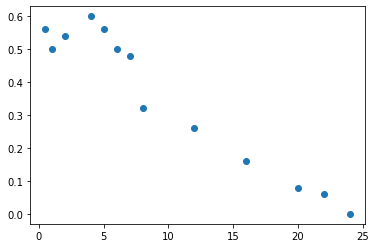

In [131]:
plt.scatter(sorted(results.keys()), [np.array(results[DIV]['same']).sum()/50 for DIV in sorted(results.keys())])

In [132]:
from scipy import stats

In [133]:
results_ks = {}

In [134]:
a = RNG.normal(0, 2, 100)

In [136]:
a_indep = RNG.normal(0, 2, 100)

In [137]:
b = RNG.normal(5, 0.2, 100) 

In [144]:
result = stats.ks_2samp(a, b)

In [146]:
result.pvalue < 0.025 or result.pvalue > 0.975

True

In [154]:
for DIV in results.keys():
    results_ks[DIV] = {
        'same' : [],
        'different' : []
    }
    for i in range(1000):
        print('Step', i)
        
        a = RNG.normal(0, 2, 100)/DIV
        a_indep = RNG.normal(0, 2, 100)/DIV
        b = RNG.normal(5, 0.2, 100)/DIV
        
        result_same = stats.ks_2samp(a, a_indep)
        result_diff = stats.ks_2samp(a, b)
        
        results_ks[DIV]['same'].append(result_same.pvalue < 0.025 or result_same.pvalue > 0.975)
        results_ks[DIV]['different'].append(result_diff.pvalue < 0.025 or result_diff.pvalue > 0.975)
        
        if results_ks[DIV]['same'][-1]:
            print('Mistake for same')
        else:
            print('Pass for same')
            
        if results_ks[DIV]['different'][-1]:
            print('Pass for different')
        else:
            print('Mistake for different')
        
    print('===================================END DIV', DIV)
        
    



Step 0
Pass for same
Pass for different
Step 1
Pass for same
Pass for different
Step 2
Pass for same
Pass for different
Step 3
Pass for same
Pass for different
Step 4
Pass for same
Pass for different
Step 5
Pass for same
Pass for different
Step 6
Pass for same
Pass for different
Step 7
Mistake for same
Pass for different
Step 8
Pass for same
Pass for different
Step 9
Pass for same
Pass for different
Step 10
Pass for same
Pass for different
Step 11
Pass for same
Pass for different
Step 12
Pass for same
Pass for different
Step 13
Mistake for same
Pass for different
Step 14
Pass for same
Pass for different
Step 15
Pass for same
Pass for different
Step 16
Pass for same
Pass for different
Step 17
Pass for same
Pass for different
Step 18
Pass for same
Pass for different
Step 19
Pass for same
Pass for different
Step 20
Pass for same
Pass for different
Step 21
Pass for same
Pass for different
Step 22
Pass for same
Pass for different
Step 23
Pass for same
Pass for different
Step 24
Pass for sam

Pass for same
Pass for different
Step 413
Pass for same
Pass for different
Step 414
Pass for same
Pass for different
Step 415
Pass for same
Pass for different
Step 416
Pass for same
Pass for different
Step 417
Pass for same
Pass for different
Step 418
Mistake for same
Pass for different
Step 419
Pass for same
Pass for different
Step 420
Pass for same
Pass for different
Step 421
Pass for same
Pass for different
Step 422
Pass for same
Pass for different
Step 423
Pass for same
Pass for different
Step 424
Pass for same
Pass for different
Step 425
Pass for same
Pass for different
Step 426
Pass for same
Pass for different
Step 427
Pass for same
Pass for different
Step 428
Pass for same
Pass for different
Step 429
Pass for same
Pass for different
Step 430
Pass for same
Pass for different
Step 431
Pass for same
Pass for different
Step 432
Mistake for same
Pass for different
Step 433
Pass for same
Pass for different
Step 434
Mistake for same
Pass for different
Step 435
Pass for same
Pass for di

Pass for same
Pass for different
Step 697
Pass for same
Pass for different
Step 698
Pass for same
Pass for different
Step 699
Pass for same
Pass for different
Step 700
Pass for same
Pass for different
Step 701
Pass for same
Pass for different
Step 702
Pass for same
Pass for different
Step 703
Pass for same
Pass for different
Step 704
Pass for same
Pass for different
Step 705
Pass for same
Pass for different
Step 706
Pass for same
Pass for different
Step 707
Pass for same
Pass for different
Step 708
Pass for same
Pass for different
Step 709
Pass for same
Pass for different
Step 710
Pass for same
Pass for different
Step 711
Pass for same
Pass for different
Step 712
Pass for same
Pass for different
Step 713
Pass for same
Pass for different
Step 714
Pass for same
Pass for different
Step 715
Pass for same
Pass for different
Step 716
Pass for same
Pass for different
Step 717
Pass for same
Pass for different
Step 718
Pass for same
Pass for different
Step 719
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 982
Pass for same
Pass for different
Step 983
Pass for same
Pass for different
Step 984
Pass for same
Pass for different
Step 985
Pass for same
Pass for different
Step 986
Pass for same
Pass for different
Step 987
Pass for same
Pass for different
Step 988
Pass for same
Pass for different
Step 989
Pass for same
Pass for different
Step 990
Pass for same
Pass for different
Step 991
Pass for same
Pass for different
Step 992
Pass for same
Pass for different
Step 993
Pass for same
Pass for different
Step 994
Pass for same
Pass for different
Step 995
Pass for same
Pass for different
Step 996
Pass for same
Pass for different
Step 997
Pass for same
Pass for different
Step 998
Pass for same
Pass for different
Step 999
Pass for same
Pass for different
===================================END DIV 0.5
Step 0
Pass for same
Pass for different
Step 1
Pass for same
Pass for different
Step 2
Pass for same
Pass for different
Step 3
Pass for same
Pass for different
Step

Pass for same
Pass for different
Step 218
Pass for same
Pass for different
Step 219
Pass for same
Pass for different
Step 220
Pass for same
Pass for different
Step 221
Pass for same
Pass for different
Step 222
Pass for same
Pass for different
Step 223
Pass for same
Pass for different
Step 224
Pass for same
Pass for different
Step 225
Pass for same
Pass for different
Step 226
Pass for same
Pass for different
Step 227
Pass for same
Pass for different
Step 228
Pass for same
Pass for different
Step 229
Pass for same
Pass for different
Step 230
Pass for same
Pass for different
Step 231
Pass for same
Pass for different
Step 232
Pass for same
Pass for different
Step 233
Pass for same
Pass for different
Step 234
Pass for same
Pass for different
Step 235
Mistake for same
Pass for different
Step 236
Pass for same
Pass for different
Step 237
Pass for same
Pass for different
Step 238
Pass for same
Pass for different
Step 239
Pass for same
Pass for different
Step 240
Pass for same
Pass for differen

Pass for same
Pass for different
Step 423
Pass for same
Pass for different
Step 424
Pass for same
Pass for different
Step 425
Pass for same
Pass for different
Step 426
Pass for same
Pass for different
Step 427
Pass for same
Pass for different
Step 428
Pass for same
Pass for different
Step 429
Pass for same
Pass for different
Step 430
Pass for same
Pass for different
Step 431
Pass for same
Pass for different
Step 432
Pass for same
Pass for different
Step 433
Pass for same
Pass for different
Step 434
Pass for same
Pass for different
Step 435
Pass for same
Pass for different
Step 436
Pass for same
Pass for different
Step 437
Pass for same
Pass for different
Step 438
Pass for same
Pass for different
Step 439
Pass for same
Pass for different
Step 440
Pass for same
Pass for different
Step 441
Mistake for same
Pass for different
Step 442
Pass for same
Pass for different
Step 443
Pass for same
Pass for different
Step 444
Pass for same
Pass for different
Step 445
Pass for same
Pass for differen

Pass for same
Pass for different
Step 667
Pass for same
Pass for different
Step 668
Pass for same
Pass for different
Step 669
Pass for same
Pass for different
Step 670
Pass for same
Pass for different
Step 671
Pass for same
Pass for different
Step 672
Pass for same
Pass for different
Step 673
Pass for same
Pass for different
Step 674
Pass for same
Pass for different
Step 675
Pass for same
Pass for different
Step 676
Pass for same
Pass for different
Step 677
Pass for same
Pass for different
Step 678
Pass for same
Pass for different
Step 679
Pass for same
Pass for different
Step 680
Pass for same
Pass for different
Step 681
Pass for same
Pass for different
Step 682
Pass for same
Pass for different
Step 683
Pass for same
Pass for different
Step 684
Pass for same
Pass for different
Step 685
Pass for same
Pass for different
Step 686
Pass for same
Pass for different
Step 687
Pass for same
Pass for different
Step 688
Pass for same
Pass for different
Step 689
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 9
Pass for same
Pass for different
Step 10
Pass for same
Pass for different
Step 11
Pass for same
Pass for different
Step 12
Pass for same
Pass for different
Step 13
Pass for same
Pass for different
Step 14
Pass for same
Pass for different
Step 15
Pass for same
Pass for different
Step 16
Pass for same
Pass for different
Step 17
Pass for same
Pass for different
Step 18
Pass for same
Pass for different
Step 19
Pass for same
Pass for different
Step 20
Pass for same
Pass for different
Step 21
Pass for same
Pass for different
Step 22
Pass for same
Pass for different
Step 23
Pass for same
Pass for different
Step 24
Pass for same
Pass for different
Step 25
Pass for same
Pass for different
Step 26
Pass for same
Pass for different
Step 27
Pass for same
Pass for different
Step 28
Pass for same
Pass for different
Step 29
Pass for same
Pass for different
Step 30
Pass for same
Pass for different
Step 31
Pass for same
Pass for different
Step 32
Pass for same
Pas

Pass for same
Pass for different
Step 317
Pass for same
Pass for different
Step 318
Pass for same
Pass for different
Step 319
Pass for same
Pass for different
Step 320
Pass for same
Pass for different
Step 321
Pass for same
Pass for different
Step 322
Pass for same
Pass for different
Step 323
Pass for same
Pass for different
Step 324
Pass for same
Pass for different
Step 325
Pass for same
Pass for different
Step 326
Pass for same
Pass for different
Step 327
Pass for same
Pass for different
Step 328
Pass for same
Pass for different
Step 329
Pass for same
Pass for different
Step 330
Pass for same
Pass for different
Step 331
Pass for same
Pass for different
Step 332
Pass for same
Pass for different
Step 333
Pass for same
Pass for different
Step 334
Pass for same
Pass for different
Step 335
Pass for same
Pass for different
Step 336
Pass for same
Pass for different
Step 337
Pass for same
Pass for different
Step 338
Pass for same
Pass for different
Step 339
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 540
Pass for same
Pass for different
Step 541
Pass for same
Pass for different
Step 542
Pass for same
Pass for different
Step 543
Pass for same
Pass for different
Step 544
Pass for same
Pass for different
Step 545
Pass for same
Pass for different
Step 546
Pass for same
Pass for different
Step 547
Pass for same
Pass for different
Step 548
Mistake for same
Pass for different
Step 549
Pass for same
Pass for different
Step 550
Pass for same
Pass for different
Step 551
Pass for same
Pass for different
Step 552
Pass for same
Pass for different
Step 553
Pass for same
Pass for different
Step 554
Pass for same
Pass for different
Step 555
Pass for same
Pass for different
Step 556
Pass for same
Pass for different
Step 557
Pass for same
Pass for different
Step 558
Pass for same
Pass for different
Step 559
Pass for same
Pass for different
Step 560
Pass for same
Pass for different
Step 561
Pass for same
Pass for different
Step 562
Pass for same
Pass for differen

Pass for same
Pass for different
Step 797
Pass for same
Pass for different
Step 798
Pass for same
Pass for different
Step 799
Pass for same
Pass for different
Step 800
Pass for same
Pass for different
Step 801
Pass for same
Pass for different
Step 802
Mistake for same
Pass for different
Step 803
Pass for same
Pass for different
Step 804
Pass for same
Pass for different
Step 805
Pass for same
Pass for different
Step 806
Pass for same
Pass for different
Step 807
Pass for same
Pass for different
Step 808
Pass for same
Pass for different
Step 809
Pass for same
Pass for different
Step 810
Pass for same
Pass for different
Step 811
Pass for same
Pass for different
Step 812
Pass for same
Pass for different
Step 813
Pass for same
Pass for different
Step 814
Pass for same
Pass for different
Step 815
Pass for same
Pass for different
Step 816
Pass for same
Pass for different
Step 817
Pass for same
Pass for different
Step 818
Pass for same
Pass for different
Step 819
Pass for same
Pass for differen

Pass for same
Pass for different
Step 24
Pass for same
Pass for different
Step 25
Pass for same
Pass for different
Step 26
Pass for same
Pass for different
Step 27
Pass for same
Pass for different
Step 28
Pass for same
Pass for different
Step 29
Pass for same
Pass for different
Step 30
Pass for same
Pass for different
Step 31
Pass for same
Pass for different
Step 32
Pass for same
Pass for different
Step 33
Pass for same
Pass for different
Step 34
Pass for same
Pass for different
Step 35
Pass for same
Pass for different
Step 36
Pass for same
Pass for different
Step 37
Pass for same
Pass for different
Step 38
Pass for same
Pass for different
Step 39
Mistake for same
Pass for different
Step 40
Pass for same
Pass for different
Step 41
Pass for same
Pass for different
Step 42
Pass for same
Pass for different
Step 43
Pass for same
Pass for different
Step 44
Pass for same
Pass for different
Step 45
Pass for same
Pass for different
Step 46
Pass for same
Pass for different
Step 47
Pass for same

Pass for same
Pass for different
Step 455
Pass for same
Pass for different
Step 456
Pass for same
Pass for different
Step 457
Pass for same
Pass for different
Step 458
Pass for same
Pass for different
Step 459
Pass for same
Pass for different
Step 460
Pass for same
Pass for different
Step 461
Mistake for same
Pass for different
Step 462
Pass for same
Pass for different
Step 463
Pass for same
Pass for different
Step 464
Pass for same
Pass for different
Step 465
Pass for same
Pass for different
Step 466
Pass for same
Pass for different
Step 467
Pass for same
Pass for different
Step 468
Mistake for same
Pass for different
Step 469
Pass for same
Pass for different
Step 470
Pass for same
Pass for different
Step 471
Pass for same
Pass for different
Step 472
Pass for same
Pass for different
Step 473
Mistake for same
Pass for different
Step 474
Pass for same
Pass for different
Step 475
Pass for same
Pass for different
Step 476
Pass for same
Pass for different
Step 477
Pass for same
Pass for di

Pass for same
Pass for different
Step 686
Pass for same
Pass for different
Step 687
Pass for same
Pass for different
Step 688
Pass for same
Pass for different
Step 689
Pass for same
Pass for different
Step 690
Pass for same
Pass for different
Step 691
Pass for same
Pass for different
Step 692
Pass for same
Pass for different
Step 693
Pass for same
Pass for different
Step 694
Pass for same
Pass for different
Step 695
Pass for same
Pass for different
Step 696
Pass for same
Pass for different
Step 697
Pass for same
Pass for different
Step 698
Pass for same
Pass for different
Step 699
Pass for same
Pass for different
Step 700
Pass for same
Pass for different
Step 701
Pass for same
Pass for different
Step 702
Pass for same
Pass for different
Step 703
Pass for same
Pass for different
Step 704
Pass for same
Pass for different
Step 705
Pass for same
Pass for different
Step 706
Pass for same
Pass for different
Step 707
Pass for same
Pass for different
Step 708
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 926
Mistake for same
Pass for different
Step 927
Pass for same
Pass for different
Step 928
Pass for same
Pass for different
Step 929
Pass for same
Pass for different
Step 930
Pass for same
Pass for different
Step 931
Pass for same
Pass for different
Step 932
Pass for same
Pass for different
Step 933
Pass for same
Pass for different
Step 934
Pass for same
Pass for different
Step 935
Pass for same
Pass for different
Step 936
Pass for same
Pass for different
Step 937
Pass for same
Pass for different
Step 938
Mistake for same
Pass for different
Step 939
Pass for same
Pass for different
Step 940
Pass for same
Pass for different
Step 941
Pass for same
Pass for different
Step 942
Pass for same
Pass for different
Step 943
Pass for same
Pass for different
Step 944
Pass for same
Pass for different
Step 945
Pass for same
Pass for different
Step 946
Pass for same
Pass for different
Step 947
Pass for same
Pass for different
Step 948
Pass for same
Pass for diffe

Pass for same
Pass for different
Step 368
Pass for same
Pass for different
Step 369
Pass for same
Pass for different
Step 370
Pass for same
Pass for different
Step 371
Pass for same
Pass for different
Step 372
Pass for same
Pass for different
Step 373
Pass for same
Pass for different
Step 374
Pass for same
Pass for different
Step 375
Pass for same
Pass for different
Step 376
Pass for same
Pass for different
Step 377
Pass for same
Pass for different
Step 378
Pass for same
Pass for different
Step 379
Pass for same
Pass for different
Step 380
Pass for same
Pass for different
Step 381
Pass for same
Pass for different
Step 382
Pass for same
Pass for different
Step 383
Pass for same
Pass for different
Step 384
Pass for same
Pass for different
Step 385
Pass for same
Pass for different
Step 386
Pass for same
Pass for different
Step 387
Pass for same
Pass for different
Step 388
Pass for same
Pass for different
Step 389
Pass for same
Pass for different
Step 390
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 658
Pass for same
Pass for different
Step 659
Pass for same
Pass for different
Step 660
Pass for same
Pass for different
Step 661
Pass for same
Pass for different
Step 662
Mistake for same
Pass for different
Step 663
Pass for same
Pass for different
Step 664
Pass for same
Pass for different
Step 665
Pass for same
Pass for different
Step 666
Pass for same
Pass for different
Step 667
Pass for same
Pass for different
Step 668
Pass for same
Pass for different
Step 669
Pass for same
Pass for different
Step 670
Pass for same
Pass for different
Step 671
Pass for same
Pass for different
Step 672
Pass for same
Pass for different
Step 673
Pass for same
Pass for different
Step 674
Pass for same
Pass for different
Step 675
Pass for same
Pass for different
Step 676
Pass for same
Pass for different
Step 677
Pass for same
Pass for different
Step 678
Pass for same
Pass for different
Step 679
Pass for same
Pass for different
Step 680
Pass for same
Pass for differen

Pass for same
Pass for different
Step 869
Pass for same
Pass for different
Step 870
Pass for same
Pass for different
Step 871
Pass for same
Pass for different
Step 872
Pass for same
Pass for different
Step 873
Pass for same
Pass for different
Step 874
Pass for same
Pass for different
Step 875
Pass for same
Pass for different
Step 876
Pass for same
Pass for different
Step 877
Pass for same
Pass for different
Step 878
Pass for same
Pass for different
Step 879
Pass for same
Pass for different
Step 880
Pass for same
Pass for different
Step 881
Pass for same
Pass for different
Step 882
Pass for same
Pass for different
Step 883
Pass for same
Pass for different
Step 884
Pass for same
Pass for different
Step 885
Pass for same
Pass for different
Step 886
Pass for same
Pass for different
Step 887
Pass for same
Pass for different
Step 888
Pass for same
Pass for different
Step 889
Pass for same
Pass for different
Step 890
Mistake for same
Pass for different
Step 891
Pass for same
Pass for differen

Pass for same
Pass for different
Step 103
Pass for same
Pass for different
Step 104
Pass for same
Pass for different
Step 105
Pass for same
Pass for different
Step 106
Pass for same
Pass for different
Step 107
Pass for same
Pass for different
Step 108
Pass for same
Pass for different
Step 109
Pass for same
Pass for different
Step 110
Pass for same
Pass for different
Step 111
Pass for same
Pass for different
Step 112
Pass for same
Pass for different
Step 113
Pass for same
Pass for different
Step 114
Pass for same
Pass for different
Step 115
Pass for same
Pass for different
Step 116
Pass for same
Pass for different
Step 117
Mistake for same
Pass for different
Step 118
Pass for same
Pass for different
Step 119
Pass for same
Pass for different
Step 120
Pass for same
Pass for different
Step 121
Pass for same
Pass for different
Step 122
Pass for same
Pass for different
Step 123
Pass for same
Pass for different
Step 124
Pass for same
Pass for different
Step 125
Pass for same
Pass for differen

Pass for same
Pass for different
Step 361
Pass for same
Pass for different
Step 362
Pass for same
Pass for different
Step 363
Pass for same
Pass for different
Step 364
Pass for same
Pass for different
Step 365
Pass for same
Pass for different
Step 366
Pass for same
Pass for different
Step 367
Pass for same
Pass for different
Step 368
Pass for same
Pass for different
Step 369
Pass for same
Pass for different
Step 370
Pass for same
Pass for different
Step 371
Pass for same
Pass for different
Step 372
Pass for same
Pass for different
Step 373
Pass for same
Pass for different
Step 374
Pass for same
Pass for different
Step 375
Pass for same
Pass for different
Step 376
Pass for same
Pass for different
Step 377
Pass for same
Pass for different
Step 378
Pass for same
Pass for different
Step 379
Pass for same
Pass for different
Step 380
Pass for same
Pass for different
Step 381
Pass for same
Pass for different
Step 382
Pass for same
Pass for different
Step 383
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 665
Pass for same
Pass for different
Step 666
Pass for same
Pass for different
Step 667
Pass for same
Pass for different
Step 668
Pass for same
Pass for different
Step 669
Pass for same
Pass for different
Step 670
Pass for same
Pass for different
Step 671
Pass for same
Pass for different
Step 672
Pass for same
Pass for different
Step 673
Pass for same
Pass for different
Step 674
Pass for same
Pass for different
Step 675
Pass for same
Pass for different
Step 676
Pass for same
Pass for different
Step 677
Pass for same
Pass for different
Step 678
Pass for same
Pass for different
Step 679
Pass for same
Pass for different
Step 680
Pass for same
Pass for different
Step 681
Pass for same
Pass for different
Step 682
Pass for same
Pass for different
Step 683
Pass for same
Pass for different
Step 684
Pass for same
Pass for different
Step 685
Pass for same
Pass for different
Step 686
Pass for same
Pass for different
Step 687
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 913
Pass for same
Pass for different
Step 914
Pass for same
Pass for different
Step 915
Pass for same
Pass for different
Step 916
Pass for same
Pass for different
Step 917
Pass for same
Pass for different
Step 918
Pass for same
Pass for different
Step 919
Pass for same
Pass for different
Step 920
Pass for same
Pass for different
Step 921
Pass for same
Pass for different
Step 922
Pass for same
Pass for different
Step 923
Mistake for same
Pass for different
Step 924
Mistake for same
Pass for different
Step 925
Pass for same
Pass for different
Step 926
Pass for same
Pass for different
Step 927
Pass for same
Pass for different
Step 928
Pass for same
Pass for different
Step 929
Mistake for same
Pass for different
Step 930
Pass for same
Pass for different
Step 931
Pass for same
Pass for different
Step 932
Pass for same
Pass for different
Step 933
Pass for same
Pass for different
Step 934
Pass for same
Pass for different
Step 935
Pass for same
Pass for di

Pass for same
Pass for different
Step 300
Pass for same
Pass for different
Step 301
Pass for same
Pass for different
Step 302
Pass for same
Pass for different
Step 303
Pass for same
Pass for different
Step 304
Pass for same
Pass for different
Step 305
Pass for same
Pass for different
Step 306
Pass for same
Pass for different
Step 307
Pass for same
Pass for different
Step 308
Pass for same
Pass for different
Step 309
Pass for same
Pass for different
Step 310
Pass for same
Pass for different
Step 311
Pass for same
Pass for different
Step 312
Pass for same
Pass for different
Step 313
Pass for same
Pass for different
Step 314
Pass for same
Pass for different
Step 315
Pass for same
Pass for different
Step 316
Pass for same
Pass for different
Step 317
Pass for same
Pass for different
Step 318
Pass for same
Pass for different
Step 319
Pass for same
Pass for different
Step 320
Mistake for same
Pass for different
Step 321
Pass for same
Pass for different
Step 322
Pass for same
Pass for differen

Pass for same
Pass for different
Step 561
Pass for same
Pass for different
Step 562
Pass for same
Pass for different
Step 563
Pass for same
Pass for different
Step 564
Pass for same
Pass for different
Step 565
Pass for same
Pass for different
Step 566
Pass for same
Pass for different
Step 567
Pass for same
Pass for different
Step 568
Pass for same
Pass for different
Step 569
Pass for same
Pass for different
Step 570
Pass for same
Pass for different
Step 571
Pass for same
Pass for different
Step 572
Pass for same
Pass for different
Step 573
Pass for same
Pass for different
Step 574
Pass for same
Pass for different
Step 575
Pass for same
Pass for different
Step 576
Mistake for same
Pass for different
Step 577
Pass for same
Pass for different
Step 578
Pass for same
Pass for different
Step 579
Pass for same
Pass for different
Step 580
Pass for same
Pass for different
Step 581
Pass for same
Pass for different
Step 582
Mistake for same
Pass for different
Step 583
Pass for same
Pass for diffe

Mistake for same
Pass for different
Step 760
Pass for same
Pass for different
Step 761
Mistake for same
Pass for different
Step 762
Pass for same
Pass for different
Step 763
Pass for same
Pass for different
Step 764
Pass for same
Pass for different
Step 765
Pass for same
Pass for different
Step 766
Pass for same
Pass for different
Step 767
Pass for same
Pass for different
Step 768
Mistake for same
Pass for different
Step 769
Pass for same
Pass for different
Step 770
Pass for same
Pass for different
Step 771
Pass for same
Pass for different
Step 772
Pass for same
Pass for different
Step 773
Pass for same
Pass for different
Step 774
Pass for same
Pass for different
Step 775
Pass for same
Pass for different
Step 776
Pass for same
Pass for different
Step 777
Pass for same
Pass for different
Step 778
Pass for same
Pass for different
Step 779
Mistake for same
Pass for different
Step 780
Pass for same
Pass for different
Step 781
Pass for same
Pass for different
Step 782
Pass for same
Pass for

Pass for same
Pass for different
Step 982
Pass for same
Pass for different
Step 983
Pass for same
Pass for different
Step 984
Pass for same
Pass for different
Step 985
Pass for same
Pass for different
Step 986
Pass for same
Pass for different
Step 987
Pass for same
Pass for different
Step 988
Pass for same
Pass for different
Step 989
Pass for same
Pass for different
Step 990
Pass for same
Pass for different
Step 991
Pass for same
Pass for different
Step 992
Mistake for same
Pass for different
Step 993
Pass for same
Pass for different
Step 994
Pass for same
Pass for different
Step 995
Pass for same
Pass for different
Step 996
Pass for same
Pass for different
Step 997
Pass for same
Pass for different
Step 998
Pass for same
Pass for different
Step 999
Pass for same
Pass for different
===================================END DIV 16
Step 0
Pass for same
Pass for different
Step 1
Pass for same
Pass for different
Step 2
Pass for same
Pass for different
Step 3
Pass for same
Pass for different
St

Pass for same
Pass for different
Step 243
Mistake for same
Pass for different
Step 244
Mistake for same
Pass for different
Step 245
Pass for same
Pass for different
Step 246
Pass for same
Pass for different
Step 247
Pass for same
Pass for different
Step 248
Pass for same
Pass for different
Step 249
Pass for same
Pass for different
Step 250
Pass for same
Pass for different
Step 251
Pass for same
Pass for different
Step 252
Pass for same
Pass for different
Step 253
Pass for same
Pass for different
Step 254
Pass for same
Pass for different
Step 255
Pass for same
Pass for different
Step 256
Pass for same
Pass for different
Step 257
Pass for same
Pass for different
Step 258
Pass for same
Pass for different
Step 259
Pass for same
Pass for different
Step 260
Pass for same
Pass for different
Step 261
Pass for same
Pass for different
Step 262
Pass for same
Pass for different
Step 263
Pass for same
Pass for different
Step 264
Pass for same
Pass for different
Step 265
Pass for same
Pass for diffe

Pass for same
Pass for different
Step 511
Pass for same
Pass for different
Step 512
Pass for same
Pass for different
Step 513
Pass for same
Pass for different
Step 514
Pass for same
Pass for different
Step 515
Pass for same
Pass for different
Step 516
Pass for same
Pass for different
Step 517
Pass for same
Pass for different
Step 518
Pass for same
Pass for different
Step 519
Pass for same
Pass for different
Step 520
Pass for same
Pass for different
Step 521
Pass for same
Pass for different
Step 522
Mistake for same
Pass for different
Step 523
Pass for same
Pass for different
Step 524
Pass for same
Pass for different
Step 525
Pass for same
Pass for different
Step 526
Pass for same
Pass for different
Step 527
Pass for same
Pass for different
Step 528
Pass for same
Pass for different
Step 529
Pass for same
Pass for different
Step 530
Pass for same
Pass for different
Step 531
Pass for same
Pass for different
Step 532
Pass for same
Pass for different
Step 533
Pass for same
Pass for differen

Pass for same
Pass for different
Step 722
Pass for same
Pass for different
Step 723
Pass for same
Pass for different
Step 724
Pass for same
Pass for different
Step 725
Pass for same
Pass for different
Step 726
Pass for same
Pass for different
Step 727
Pass for same
Pass for different
Step 728
Pass for same
Pass for different
Step 729
Pass for same
Pass for different
Step 730
Pass for same
Pass for different
Step 731
Pass for same
Pass for different
Step 732
Pass for same
Pass for different
Step 733
Pass for same
Pass for different
Step 734
Pass for same
Pass for different
Step 735
Pass for same
Pass for different
Step 736
Pass for same
Pass for different
Step 737
Pass for same
Pass for different
Step 738
Pass for same
Pass for different
Step 739
Pass for same
Pass for different
Step 740
Pass for same
Pass for different
Step 741
Pass for same
Pass for different
Step 742
Pass for same
Pass for different
Step 743
Pass for same
Pass for different
Step 744
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 919
Pass for same
Pass for different
Step 920
Pass for same
Pass for different
Step 921
Pass for same
Pass for different
Step 922
Pass for same
Pass for different
Step 923
Pass for same
Pass for different
Step 924
Pass for same
Pass for different
Step 925
Pass for same
Pass for different
Step 926
Pass for same
Pass for different
Step 927
Pass for same
Pass for different
Step 928
Pass for same
Pass for different
Step 929
Pass for same
Pass for different
Step 930
Pass for same
Pass for different
Step 931
Pass for same
Pass for different
Step 932
Pass for same
Pass for different
Step 933
Pass for same
Pass for different
Step 934
Pass for same
Pass for different
Step 935
Pass for same
Pass for different
Step 936
Pass for same
Pass for different
Step 937
Pass for same
Pass for different
Step 938
Pass for same
Pass for different
Step 939
Mistake for same
Pass for different
Step 940
Pass for same
Pass for different
Step 941
Pass for same
Pass for differen

Pass for same
Pass for different
Step 165
Pass for same
Pass for different
Step 166
Pass for same
Pass for different
Step 167
Pass for same
Pass for different
Step 168
Pass for same
Pass for different
Step 169
Pass for same
Pass for different
Step 170
Pass for same
Pass for different
Step 171
Pass for same
Pass for different
Step 172
Pass for same
Pass for different
Step 173
Pass for same
Pass for different
Step 174
Pass for same
Pass for different
Step 175
Pass for same
Pass for different
Step 176
Pass for same
Pass for different
Step 177
Pass for same
Pass for different
Step 178
Pass for same
Pass for different
Step 179
Pass for same
Pass for different
Step 180
Pass for same
Pass for different
Step 181
Pass for same
Pass for different
Step 182
Pass for same
Pass for different
Step 183
Pass for same
Pass for different
Step 184
Pass for same
Pass for different
Step 185
Pass for same
Pass for different
Step 186
Pass for same
Pass for different
Step 187
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 385
Pass for same
Pass for different
Step 386
Pass for same
Pass for different
Step 387
Pass for same
Pass for different
Step 388
Pass for same
Pass for different
Step 389
Pass for same
Pass for different
Step 390
Pass for same
Pass for different
Step 391
Pass for same
Pass for different
Step 392
Pass for same
Pass for different
Step 393
Pass for same
Pass for different
Step 394
Pass for same
Pass for different
Step 395
Pass for same
Pass for different
Step 396
Pass for same
Pass for different
Step 397
Pass for same
Pass for different
Step 398
Pass for same
Pass for different
Step 399
Pass for same
Pass for different
Step 400
Pass for same
Pass for different
Step 401
Pass for same
Pass for different
Step 402
Pass for same
Pass for different
Step 403
Pass for same
Pass for different
Step 404
Pass for same
Pass for different
Step 405
Pass for same
Pass for different
Step 406
Pass for same
Pass for different
Step 407
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 632
Pass for same
Pass for different
Step 633
Pass for same
Pass for different
Step 634
Pass for same
Pass for different
Step 635
Pass for same
Pass for different
Step 636
Pass for same
Pass for different
Step 637
Pass for same
Pass for different
Step 638
Pass for same
Pass for different
Step 639
Pass for same
Pass for different
Step 640
Pass for same
Pass for different
Step 641
Pass for same
Pass for different
Step 642
Pass for same
Pass for different
Step 643
Pass for same
Pass for different
Step 644
Pass for same
Pass for different
Step 645
Pass for same
Pass for different
Step 646
Pass for same
Pass for different
Step 647
Pass for same
Pass for different
Step 648
Pass for same
Pass for different
Step 649
Pass for same
Pass for different
Step 650
Pass for same
Pass for different
Step 651
Pass for same
Pass for different
Step 652
Pass for same
Pass for different
Step 653
Pass for same
Pass for different
Step 654
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 847
Pass for same
Pass for different
Step 848
Pass for same
Pass for different
Step 849
Pass for same
Pass for different
Step 850
Pass for same
Pass for different
Step 851
Pass for same
Pass for different
Step 852
Mistake for same
Pass for different
Step 853
Pass for same
Pass for different
Step 854
Pass for same
Pass for different
Step 855
Pass for same
Pass for different
Step 856
Pass for same
Pass for different
Step 857
Mistake for same
Pass for different
Step 858
Mistake for same
Pass for different
Step 859
Pass for same
Pass for different
Step 860
Pass for same
Pass for different
Step 861
Pass for same
Pass for different
Step 862
Pass for same
Pass for different
Step 863
Pass for same
Pass for different
Step 864
Pass for same
Pass for different
Step 865
Mistake for same
Pass for different
Step 866
Pass for same
Pass for different
Step 867
Pass for same
Pass for different
Step 868
Pass for same
Pass for different
Step 869
Pass for same
Pass for

Pass for same
Pass for different
Step 124
Pass for same
Pass for different
Step 125
Pass for same
Pass for different
Step 126
Pass for same
Pass for different
Step 127
Pass for same
Pass for different
Step 128
Pass for same
Pass for different
Step 129
Pass for same
Pass for different
Step 130
Pass for same
Pass for different
Step 131
Pass for same
Pass for different
Step 132
Pass for same
Pass for different
Step 133
Pass for same
Pass for different
Step 134
Pass for same
Pass for different
Step 135
Pass for same
Pass for different
Step 136
Pass for same
Pass for different
Step 137
Pass for same
Pass for different
Step 138
Pass for same
Pass for different
Step 139
Pass for same
Pass for different
Step 140
Pass for same
Pass for different
Step 141
Pass for same
Pass for different
Step 142
Pass for same
Pass for different
Step 143
Pass for same
Pass for different
Step 144
Pass for same
Pass for different
Step 145
Pass for same
Pass for different
Step 146
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 354
Pass for same
Pass for different
Step 355
Pass for same
Pass for different
Step 356
Pass for same
Pass for different
Step 357
Pass for same
Pass for different
Step 358
Pass for same
Pass for different
Step 359
Pass for same
Pass for different
Step 360
Pass for same
Pass for different
Step 361
Pass for same
Pass for different
Step 362
Pass for same
Pass for different
Step 363
Pass for same
Pass for different
Step 364
Pass for same
Pass for different
Step 365
Pass for same
Pass for different
Step 366
Pass for same
Pass for different
Step 367
Pass for same
Pass for different
Step 368
Pass for same
Pass for different
Step 369
Pass for same
Pass for different
Step 370
Pass for same
Pass for different
Step 371
Pass for same
Pass for different
Step 372
Pass for same
Pass for different
Step 373
Pass for same
Pass for different
Step 374
Pass for same
Pass for different
Step 375
Pass for same
Pass for different
Step 376
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 570
Pass for same
Pass for different
Step 571
Pass for same
Pass for different
Step 572
Pass for same
Pass for different
Step 573
Pass for same
Pass for different
Step 574
Pass for same
Pass for different
Step 575
Pass for same
Pass for different
Step 576
Pass for same
Pass for different
Step 577
Pass for same
Pass for different
Step 578
Pass for same
Pass for different
Step 579
Mistake for same
Pass for different
Step 580
Pass for same
Pass for different
Step 581
Pass for same
Pass for different
Step 582
Pass for same
Pass for different
Step 583
Pass for same
Pass for different
Step 584
Pass for same
Pass for different
Step 585
Pass for same
Pass for different
Step 586
Pass for same
Pass for different
Step 587
Pass for same
Pass for different
Step 588
Pass for same
Pass for different
Step 589
Pass for same
Pass for different
Step 590
Pass for same
Pass for different
Step 591
Pass for same
Pass for different
Step 592
Pass for same
Pass for differen

Pass for same
Pass for different
Step 772
Pass for same
Pass for different
Step 773
Pass for same
Pass for different
Step 774
Pass for same
Pass for different
Step 775
Mistake for same
Pass for different
Step 776
Pass for same
Pass for different
Step 777
Pass for same
Pass for different
Step 778
Pass for same
Pass for different
Step 779
Pass for same
Pass for different
Step 780
Pass for same
Pass for different
Step 781
Pass for same
Pass for different
Step 782
Mistake for same
Pass for different
Step 783
Pass for same
Pass for different
Step 784
Pass for same
Pass for different
Step 785
Mistake for same
Pass for different
Step 786
Pass for same
Pass for different
Step 787
Pass for same
Pass for different
Step 788
Pass for same
Pass for different
Step 789
Pass for same
Pass for different
Step 790
Pass for same
Pass for different
Step 791
Pass for same
Pass for different
Step 792
Pass for same
Pass for different
Step 793
Pass for same
Pass for different
Step 794
Pass for same
Pass for di

Pass for same
Pass for different
Step 50
Pass for same
Pass for different
Step 51
Pass for same
Pass for different
Step 52
Pass for same
Pass for different
Step 53
Pass for same
Pass for different
Step 54
Pass for same
Pass for different
Step 55
Pass for same
Pass for different
Step 56
Pass for same
Pass for different
Step 57
Pass for same
Pass for different
Step 58
Pass for same
Pass for different
Step 59
Pass for same
Pass for different
Step 60
Pass for same
Pass for different
Step 61
Mistake for same
Pass for different
Step 62
Pass for same
Pass for different
Step 63
Pass for same
Pass for different
Step 64
Pass for same
Pass for different
Step 65
Pass for same
Pass for different
Step 66
Pass for same
Pass for different
Step 67
Pass for same
Pass for different
Step 68
Pass for same
Pass for different
Step 69
Pass for same
Pass for different
Step 70
Pass for same
Pass for different
Step 71
Pass for same
Pass for different
Step 72
Pass for same
Pass for different
Step 73
Pass for same

Pass for same
Pass for different
Step 318
Pass for same
Pass for different
Step 319
Pass for same
Pass for different
Step 320
Pass for same
Pass for different
Step 321
Pass for same
Pass for different
Step 322
Pass for same
Pass for different
Step 323
Pass for same
Pass for different
Step 324
Pass for same
Pass for different
Step 325
Pass for same
Pass for different
Step 326
Pass for same
Pass for different
Step 327
Pass for same
Pass for different
Step 328
Pass for same
Pass for different
Step 329
Pass for same
Pass for different
Step 330
Pass for same
Pass for different
Step 331
Pass for same
Pass for different
Step 332
Pass for same
Pass for different
Step 333
Mistake for same
Pass for different
Step 334
Pass for same
Pass for different
Step 335
Pass for same
Pass for different
Step 336
Pass for same
Pass for different
Step 337
Pass for same
Pass for different
Step 338
Pass for same
Pass for different
Step 339
Pass for same
Pass for different
Step 340
Pass for same
Pass for differen

Pass for different
Step 636
Pass for same
Pass for different
Step 637
Pass for same
Pass for different
Step 638
Pass for same
Pass for different
Step 639
Mistake for same
Pass for different
Step 640
Pass for same
Pass for different
Step 641
Pass for same
Pass for different
Step 642
Pass for same
Pass for different
Step 643
Pass for same
Pass for different
Step 644
Pass for same
Pass for different
Step 645
Pass for same
Pass for different
Step 646
Pass for same
Pass for different
Step 647
Mistake for same
Pass for different
Step 648
Pass for same
Pass for different
Step 649
Pass for same
Pass for different
Step 650
Pass for same
Pass for different
Step 651
Pass for same
Pass for different
Step 652
Pass for same
Pass for different
Step 653
Pass for same
Pass for different
Step 654
Pass for same
Pass for different
Step 655
Pass for same
Pass for different
Step 656
Pass for same
Pass for different
Step 657
Pass for same
Pass for different
Step 658
Pass for same
Pass for different
Step 659


Mistake for same
Pass for different
Step 922
Pass for same
Pass for different
Step 923
Pass for same
Pass for different
Step 924
Pass for same
Pass for different
Step 925
Pass for same
Pass for different
Step 926
Pass for same
Pass for different
Step 927
Pass for same
Pass for different
Step 928
Pass for same
Pass for different
Step 929
Mistake for same
Pass for different
Step 930
Pass for same
Pass for different
Step 931
Pass for same
Pass for different
Step 932
Pass for same
Pass for different
Step 933
Pass for same
Pass for different
Step 934
Pass for same
Pass for different
Step 935
Pass for same
Pass for different
Step 936
Pass for same
Pass for different
Step 937
Pass for same
Pass for different
Step 938
Pass for same
Pass for different
Step 939
Pass for same
Pass for different
Step 940
Pass for same
Pass for different
Step 941
Pass for same
Pass for different
Step 942
Pass for same
Pass for different
Step 943
Pass for same
Pass for different
Step 944
Mistake for same
Pass for di

Pass for same
Pass for different
Step 303
Pass for same
Pass for different
Step 304
Mistake for same
Pass for different
Step 305
Pass for same
Pass for different
Step 306
Pass for same
Pass for different
Step 307
Pass for same
Pass for different
Step 308
Pass for same
Pass for different
Step 309
Pass for same
Pass for different
Step 310
Mistake for same
Pass for different
Step 311
Pass for same
Pass for different
Step 312
Pass for same
Pass for different
Step 313
Pass for same
Pass for different
Step 314
Pass for same
Pass for different
Step 315
Pass for same
Pass for different
Step 316
Pass for same
Pass for different
Step 317
Pass for same
Pass for different
Step 318
Pass for same
Pass for different
Step 319
Pass for same
Pass for different
Step 320
Pass for same
Pass for different
Step 321
Mistake for same
Pass for different
Step 322
Mistake for same
Pass for different
Step 323
Pass for same
Pass for different
Step 324
Pass for same
Pass for different
Step 325
Pass for same
Pass for

Pass for same
Pass for different
Step 520
Pass for same
Pass for different
Step 521
Pass for same
Pass for different
Step 522
Pass for same
Pass for different
Step 523
Pass for same
Pass for different
Step 524
Pass for same
Pass for different
Step 525
Pass for same
Pass for different
Step 526
Pass for same
Pass for different
Step 527
Pass for same
Pass for different
Step 528
Pass for same
Pass for different
Step 529
Pass for same
Pass for different
Step 530
Mistake for same
Pass for different
Step 531
Pass for same
Pass for different
Step 532
Pass for same
Pass for different
Step 533
Pass for same
Pass for different
Step 534
Pass for same
Pass for different
Step 535
Pass for same
Pass for different
Step 536
Pass for same
Pass for different
Step 537
Pass for same
Pass for different
Step 538
Pass for same
Pass for different
Step 539
Pass for same
Pass for different
Step 540
Pass for same
Pass for different
Step 541
Pass for same
Pass for different
Step 542
Pass for same
Pass for differen

Pass for same
Pass for different
Step 737
Pass for same
Pass for different
Step 738
Pass for same
Pass for different
Step 739
Pass for same
Pass for different
Step 740
Pass for same
Pass for different
Step 741
Pass for same
Pass for different
Step 742
Pass for same
Pass for different
Step 743
Pass for same
Pass for different
Step 744
Pass for same
Pass for different
Step 745
Pass for same
Pass for different
Step 746
Pass for same
Pass for different
Step 747
Pass for same
Pass for different
Step 748
Pass for same
Pass for different
Step 749
Pass for same
Pass for different
Step 750
Pass for same
Pass for different
Step 751
Pass for same
Pass for different
Step 752
Pass for same
Pass for different
Step 753
Pass for same
Pass for different
Step 754
Pass for same
Pass for different
Step 755
Pass for same
Pass for different
Step 756
Pass for same
Pass for different
Step 757
Pass for same
Pass for different
Step 758
Pass for same
Pass for different
Step 759
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 136
Pass for same
Pass for different
Step 137
Mistake for same
Pass for different
Step 138
Pass for same
Pass for different
Step 139
Pass for same
Pass for different
Step 140
Pass for same
Pass for different
Step 141
Pass for same
Pass for different
Step 142
Pass for same
Pass for different
Step 143
Pass for same
Pass for different
Step 144
Pass for same
Pass for different
Step 145
Pass for same
Pass for different
Step 146
Pass for same
Pass for different
Step 147
Pass for same
Pass for different
Step 148
Pass for same
Pass for different
Step 149
Pass for same
Pass for different
Step 150
Pass for same
Pass for different
Step 151
Pass for same
Pass for different
Step 152
Pass for same
Pass for different
Step 153
Pass for same
Pass for different
Step 154
Pass for same
Pass for different
Step 155
Pass for same
Pass for different
Step 156
Pass for same
Pass for different
Step 157
Mistake for same
Pass for different
Step 158
Pass for same
Pass for diffe

Pass for same
Pass for different
Step 372
Pass for same
Pass for different
Step 373
Pass for same
Pass for different
Step 374
Pass for same
Pass for different
Step 375
Pass for same
Pass for different
Step 376
Pass for same
Pass for different
Step 377
Pass for same
Pass for different
Step 378
Pass for same
Pass for different
Step 379
Pass for same
Pass for different
Step 380
Pass for same
Pass for different
Step 381
Pass for same
Pass for different
Step 382
Pass for same
Pass for different
Step 383
Pass for same
Pass for different
Step 384
Pass for same
Pass for different
Step 385
Pass for same
Pass for different
Step 386
Pass for same
Pass for different
Step 387
Pass for same
Pass for different
Step 388
Pass for same
Pass for different
Step 389
Pass for same
Pass for different
Step 390
Pass for same
Pass for different
Step 391
Pass for same
Pass for different
Step 392
Pass for same
Pass for different
Step 393
Pass for same
Pass for different
Step 394
Pass for same
Pass for different
S

Pass for same
Pass for different
Step 637
Pass for same
Pass for different
Step 638
Pass for same
Pass for different
Step 639
Pass for same
Pass for different
Step 640
Pass for same
Pass for different
Step 641
Pass for same
Pass for different
Step 642
Pass for same
Pass for different
Step 643
Pass for same
Pass for different
Step 644
Pass for same
Pass for different
Step 645
Pass for same
Pass for different
Step 646
Pass for same
Pass for different
Step 647
Pass for same
Pass for different
Step 648
Mistake for same
Pass for different
Step 649
Mistake for same
Pass for different
Step 650
Pass for same
Pass for different
Step 651
Pass for same
Pass for different
Step 652
Pass for same
Pass for different
Step 653
Pass for same
Pass for different
Step 654
Pass for same
Pass for different
Step 655
Pass for same
Pass for different
Step 656
Pass for same
Pass for different
Step 657
Pass for same
Pass for different
Step 658
Pass for same
Pass for different
Step 659
Pass for same
Pass for diffe

Pass for same
Pass for different
Step 863
Pass for same
Pass for different
Step 864
Pass for same
Pass for different
Step 865
Pass for same
Pass for different
Step 866
Pass for same
Pass for different
Step 867
Pass for same
Pass for different
Step 868
Pass for same
Pass for different
Step 869
Pass for same
Pass for different
Step 870
Pass for same
Pass for different
Step 871
Mistake for same
Pass for different
Step 872
Pass for same
Pass for different
Step 873
Pass for same
Pass for different
Step 874
Pass for same
Pass for different
Step 875
Pass for same
Pass for different
Step 876
Pass for same
Pass for different
Step 877
Pass for same
Pass for different
Step 878
Pass for same
Pass for different
Step 879
Pass for same
Pass for different
Step 880
Pass for same
Pass for different
Step 881
Pass for same
Pass for different
Step 882
Pass for same
Pass for different
Step 883
Pass for same
Pass for different
Step 884
Pass for same
Pass for different
Step 885
Mistake for same
Pass for diffe

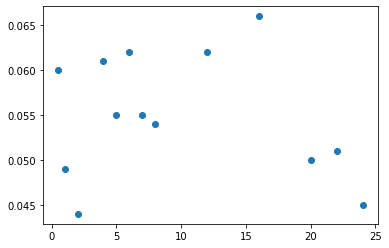

In [155]:
plt.scatter(sorted(results.keys()), [np.array(results_ks[DIV]['same']).sum()/1000 for DIV in sorted(results.keys())])

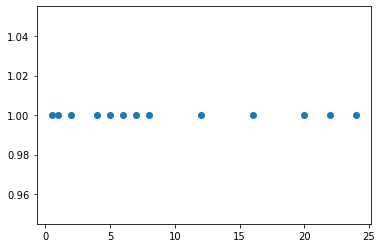

In [156]:
plt.scatter(sorted(results.keys()), [np.array(results_ks[DIV]['different']).sum()/1000 for DIV in sorted(results.keys())])